#Home Work 4

1) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

3)https://www.google.com/search?client=safari&rls=en&q=what+is+rank+of+a+matrix&ie=UTF-8&oe=UTF-8

4)https://keras.io/api/layers/base_layer/#getweights-method

5)https://stackoverflow.com/questions/68353001/keras-weight-contraints-including-both-bias-and-kernel-matrix-at-the-same-time

6)https://math.stackexchange.com/questions/243533/how-to-intuitively-understand-eigenvalue-and-eigenvector

7) Steve Brunton youtube playlist on SVD ( loved his explanation !)

8)https://medium.com/@mukeshkumar_46704/my-intuition-to-learn-eigenvalues-and-eigenvectors-c185f4f3435c

9)https://www.tensorflow.org/api_docs/python/tf/keras/Model

10)http://databookuw.com/databook.pdf (Steve Bruntons book)


Discussed and Collaborated with Sushant and Ramki

#GPU Check

In [ ]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.3472951630000125
GPU (s):
0.0423514290000071
GPU speedup over CPU: 79x


#Dependencies

In [ ]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Activation, Flatten
from librosa.core import stft,istft
import soundfile as sf
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

##Load Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

print('dimensions of X_train : {}'.format(X_train.shape))
print('dimensions of y_train : {}'.format(y_train.shape))
print('dimensions of X_test  : {}'.format(X_test.shape))
print('dimensions of y_test  : {}'.format(y_test.shape))

11490434/11490434 [==============================] - 2s 0us/step
dimensions of X_train : (60000, 28, 28)
dimensions of y_train : (60000,)
dimensions of X_test  : (10000, 28, 28)
dimensions of y_test  : (10000,)


In [ ]:
X_test = X_test/255
X_train = X_train/255

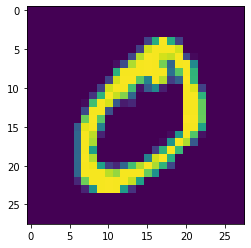

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1])

##Split Train Data Set to Train and Validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train2,X_val,y_train2,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state= None, shuffle=False, stratify=None)

print('dimensions of X_train2 : {}'.format(X_train2.shape))
print('dimensions of y_train2 : {}'.format(y_train2.shape))
print('dimensions of X_val  : {}'.format(X_val.shape))
print('dimensions of y_val  : {}'.format(y_val.shape))

dimensions of X_train2 : (48000, 28, 28)
dimensions of y_train2 : (48000,)
dimensions of X_val  : (12000, 28, 28)
dimensions of y_val  : (12000,)


##SVD 

In [ ]:
sum1, direction1, value1 = tf.linalg.svd(model.get_layer(index=1).get_weights()[0])
sum2, direction2, value2 = tf.linalg.svd(model.get_layer(index=2).get_weights()[0])
sum3, direction3, value3 = tf.linalg.svd(model.get_layer(index=3).get_weights()[0])
sum4, direction4, value4 = tf.linalg.svd(model.get_layer(index=4).get_weights()[0])
sum5, direction5, value5 = tf.linalg.svd(model.get_layer(index=5).get_weights()[0])

S1 = tf.linalg.diag(sum1)
S2 = tf.linalg.diag(sum2)
S3 = tf.linalg.diag(sum3)
S4 = tf.linalg.diag(sum4)
S5 = tf.linalg.diag(sum5)

V1 = tf.transpose(value1)
V2 = tf.transpose(value2)
V3 = tf.transpose(value3)
V4 = tf.transpose(value4)
V5 = tf.transpose(value5)

D1 = direction1
D2 = direction2
D3 = direction3
D4 = direction4
D5 = direction5


B1 = model.get_layer(index=1).get_weights()[1]
B2 = model.get_layer(index=2).get_weights()[1]
B3 = model.get_layer(index=3).get_weights()[1]
B4 = model.get_layer(index=4).get_weights()[1]
B5 = model.get_layer(index=5).get_weights()[1]


##Slice sum,value and direction for rank 20

In [ ]:
rank = 20
D1_20 = D1[:, :rank]
S1_20 = S1[:rank, :rank]
V1_20 = V1[:rank, :]
V1_20f = tf.matmul(S1_20,V1_20)

D2_20 = D2[:, :rank]
S2_20 = S2[:rank, :rank]
V2_20 = V2[:rank, :]
V2_20f = tf.matmul(S2_20,V2_20)

D3_20 = D3[:, :rank]
S3_20 = S3[:rank, :rank]
V3_20 = V3[:rank, :]
V3_20f = tf.matmul(S3_20,V3_20)

D4_20 = D4[:, :rank]
S4_20 = S4[:rank, :rank]
V4_20 = V4[:rank, :]
V4_20f = tf.matmul(S4_20,V4_20)

D5_20 = D5[:, :rank]
S5_20 = S5[:rank, :rank]
V5_20 = V5[:rank, :]
V5_20f = tf.matmul(S5_20,V5_20)

In [ ]:
print("Shape of U initial is : ",D1_20.shape)
print("Shape of V initial is : ",V1_20f.shape)
print("Shape of U later is : ",D5_20.shape)
print("Shape of V later is : ",V5_20f.shape)




Shape of U initial is :  (784, 20)
Shape of V initial is :  (20, 1024)
Shape of U later is :  (1024, 20)
Shape of V later is :  (20, 1024)


Shapes Map :

U ( m * rank) 

V ( rank * n)

Dot product shape is M * N 



In [ ]:
weights =[]
weights.append(D1_20)
weights.append(V1_20f)
weights.append(D2_20)
weights.append(V2_20f)
weights.append(D3_20)
weights.append(V3_20f)
weights.append(D4_20)
weights.append(V4_20f)
weights.append(D5_20)
weights.append(V5_20f)

#Model

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28,28)),

    tf.keras.layers.Dense(units=20,name="D1_layer"),
    tf.keras.layers.Dense(units=1024,activation='relu',name="target_layer1"),

    tf.keras.layers.Dense(units=20,name="D2_layer"),
    tf.keras.layers.Dense(units=1024,activation='relu',name="target_layer2"),

    tf.keras.layers.Dense(units=20,name="D3_layer"),
    tf.keras.layers.Dense(units=1024,activation='relu',name="target_layer3"),

    tf.keras.layers.Dense(units=20,name="D4_layer"),
    tf.keras.layers.Dense(units=1024,activation='relu',name="target_layer4"),

    tf.keras.layers.Dense(units=20,name="D5_layer"),
    tf.keras.layers.Dense(units=1024,activation='relu',name="target_layer5"),
    
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 D1_layer (Dense)            (None, 20)                15700     
                                                                 
 target_layer1 (Dense)       (None, 1024)              21504     
                                                                 
 D2_layer (Dense)            (None, 20)                20500     
                                                                 
 target_layer2 (Dense)       (None, 1024)              21504     
                                                                 
 D3_layer (Dense)            (None, 20)                20500     
                                                                 
 target_layer3 (Dense)       (None, 1024)              2

In [ ]:
# bias1 = model2.get_layer(index = 1).get_weights()[1]
# bias2 = model2.get_layer(index = 2).get_weights()[1]
# bias3 = model2.get_layer(index = 3).get_weights()[1]
# bias4 = model2.get_layer(index = 4).get_weights()[1]
# bias5 = model2.get_layer(index = 5).get_weights()[1]
# bias6 = model2.get_layer(index = 6).get_weights()[1]
# bias7 = model2.get_layer(index = 7).get_weights()[1]
# bias8 = model2.get_layer(index = 8).get_weights()[1]
# bias9 = model2.get_layer(index = 9).get_weights()[1]
# bias10 = model2.get_layer(index = 10).get_weights()[1]

In [ ]:
bias = []

for i in range(1,len(model2.layers)-1):
  bias.append(model2.layers[i].get_weights()[1])

##Set Weights of layers

D values in DX_layers. (X = index of layer for D, see model summary)

VX_20f in target_layers. ( X = index of layer for SV, see model summary)

In [ ]:
len(weights)

10

In [ ]:
for i in range(len(weights)):
  model2.layers[i+1].set_weights([weights[i],bias[i]])


Just the shape of weight matrix at odd layers i.e U

In [ ]:
 WL1 = model2.layers[1].get_weights()[0]

 WL1.shape

(784, 20)

Just the shape of weight matrix at even layers i.e S*V

In [ ]:
WL4 = model2.layers[4].get_weights()[0]
WL4.shape

(20, 1024)

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),loss = tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train,y_train,epochs = 30, batch_size = 256 )

Epoch 1/30
235/235 [==============================] - 2s 4ms/step - loss: 1.7243 - accuracy: 0.5440
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3492 - accuracy: 0.9018
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1977 - accuracy: 0.9430
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1565 - accuracy: 0.9546
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1340 - accuracy: 0.9605
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1188 - accuracy: 0.9649
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1077 - accuracy: 0.9672
Epoch 8/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0986 - accuracy: 0.9702
Epoch 9/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0906 - accuracy: 0.9728
Epoch 10/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.9743

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0925 - accuracy: 0.9761


[0.092485211789608, 0.9761000275611877]

Text(0.5, 1.0, 'Model Loss Progression')

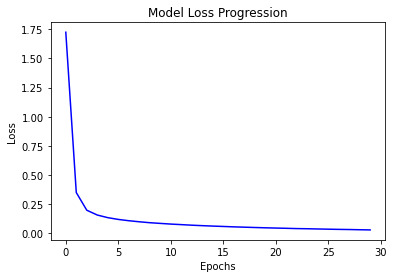

In [ ]:
plt.plot(history2.history['loss'], color='blue')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Model Loss Progression")

In [ ]:
%%shell
jupyter nbconvert --to html /content/Deep_Learning_HW4_Q4.ipynb